In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
pd.set_option('display.max_columns',200)
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

In [2]:
def cluster(x,clusters):
    
    x=x
    allscore = []
    allclusters = []
    sum_of_squared_distances = []
    
    for i in np.arange(1,clusters):
        
        i+=1
        model=KMeans(n_clusters=i)
        pred=model.fit_predict(x)
        s_score=silhouette_score(x,pred)
        print('Number of cluster: {} , Score: {}'.format(i,s_score))
        allscore.append(s_score)
        allclusters.append(i)
        sum_of_squared_distances.append(model.inertia_)
        
    plt.figure(figsize=(10,10))
    plt.plot(allclusters,sum_of_squared_distances,marker='x',c='m');

In [3]:
df=pd.read_csv('PBL5recommendationdata.csv',encoding='latin-1')

In [4]:
df.sample(7)

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
1439,1193,Deborah,Tayler,Company109,1435113840,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1437764338,0.0,4640,1193,Deborah,Tayler,Company109,4640,NaN,NaN,NaN,USD,NaN,77.99,0.00,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.94,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,1ZF11Y490399585507,3.0,1.435114e+09,NaN,authorize.net,NaN,87.94,NaN,7291037355,02385R,NaN,1,1435114225,1.440535e+09,1.435244e+09,Badly on need !!!!,NaN,Na

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4194 entries, 0 to 4193
Columns: 181 entries, Customers.id to Products.freight_cost
dtypes: float64(98), int64(10), object(73)
memory usage: 5.8+ MB


In [6]:
df.corr()['Orders.total'].sort_values(ascending=False).head(15)

Orders.weight             1.000000
Orders.total              1.000000
Orders.subtotal           0.997013
Customers.tax_exempt      0.994398
Orders.payment_amount     0.992953
Orders.discount_amount    0.928716
Products.map_price        0.925721
Products.amazon_price     0.716534
Products.sale_price       0.637339
Orders.fee_amount         0.628024
Orders.coupon_amount      0.561841
Orders.external_id        0.489013
Orders.balance_due        0.482971
Order_Items.price         0.428587
Order_Items.cost          0.425841
Name: Orders.total, dtype: float64

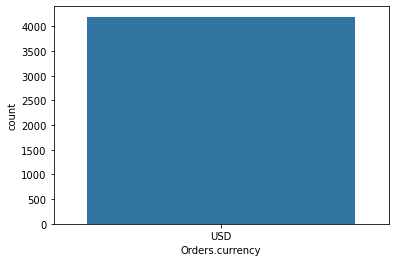

In [7]:
sns.countplot(df['Orders.currency']);

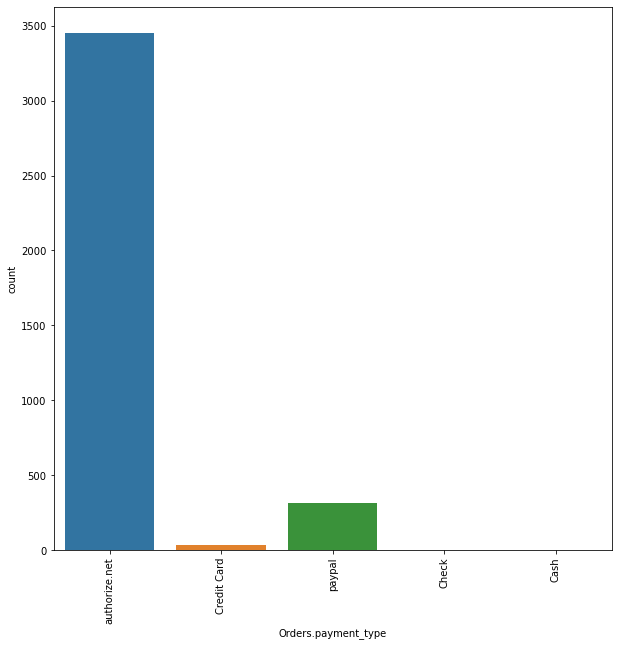

In [8]:
plt.figure(figsize=(10,10))
sns.countplot(df['Orders.payment_type'])
plt.xticks(rotation=90);

In [9]:
data=df[['Order_Items.product_name','Products.name','Order_Items.qty','Orders.total','Orders.currency','Orders.payment_type','Orders.comments','Products.google_shopping_type']]

In [10]:
data.shape

(4194, 8)

In [11]:
data.sample(10)

,Order_Items.product_name,Products.name,Order_Items.qty,Orders.total,Orders.currency,Orders.payment_type,Orders.comments,Products.google_shopping_type
711,"Safety Skids Slippers, Gray, 2XL","Safety Skids Slippers,Gray,2XL",1,224.22,USD,authorize.net,NaN,Apparel > Patient Apparel > Slippers
73,Over door Traction Set,Over door Traction Set,1,27.41,USD,authorize.net,NaN,Physical Therapy > Modalities > Traction
3094,"SensiCare Silk Nitrile Exam Gloves, Dark Blue,...","SensiCare Silk Nitrile Exam Gloves,Dark Blue,S...",1,290.01,USD,authorize.net,NaN,Apparel > Gloves > Nonsterile PF LF Synthetic ...
2676,"CanDo&reg; Hand Exercise Web - Latex Free - 7""...","CanDo&reg; Hand Exercise Web - Latex Free - 7""...",1,97.45,USD,authorize.net,NaN,Fitness > Exercise > Hand Extension
955,"Medline OTC060001 Hydrocerin Cream, 0.00","Hydrocerin Cream,16.00 OZ",2,29.93,USD,authorize.net,NaN,Personal Care > Skin Care > Lotions
3382,Aloetouch 3G Powder-Free Latex-Free Synthetic ...,Aloetouch 3G Powder-Free Latex-Free Synthetic ...,1,259.70,USD,authorize.net,NaN,Apparel > Gloves > Nonsterile PF LF Vinyl Exam...
2591,"Ultrasorbs AP Underpads, White","Ultrasorbs AP Underpads,White,36"" X 24""",1,119.95,USD,authorize.net,NaN,"Incontinence, Urology & Ostomy > incontinence ..."
1340,Heavy Duty Bariatric Walker Rollator with Larg...,Heavy Duty Bariatric Walker Rollator with Larg...,1,122.39,USD,authorize.net,NaN,"Walking Aids > Rollators, & Walkers > Rollators"
680,Medline EXTSRB2336AZ Extrasorbs Air-Permeable ...,"Extrasorbs Air-Permeable Disposable Drypads,Wh...",2,35.93,USD,paypal,NaN,"Incontinence, Urology & Ostomy > incontinence ..."
2696,"Contour Bedpans, Graphite","Contour Bedpans,Graphite",1,47.08,USD,authorize.net,NaN,Patient Room And Bedding > Bedside Care > Bedpans


In [12]:
data=pd.get_dummies(data,drop_first=True)

In [13]:
model=KMeans(n_clusters=4)
pred=model.fit_predict(data)
silhouette_score(data,pred)

0.7054042965347286

In [14]:
data['Cluster']=pred

In [15]:
data.sample(10)

,Order_Items.qty,Orders.total,Order_Items.product_name_1 Box Of Medline Commode Liners with Absorbent Pad,Order_Items.product_name_1 Pad of CURAD Mediplast Wart Pad,"Order_Items.product_name_1-Ply Blockade AngelStat Surgical Gowns, Ceil Blue, Extra Large","Order_Items.product_name_1/2"" self-adhesive hook material, 25 yard dispenser box, white","Order_Items.product_name_1/2"" self-adhesive loop material, 25 yard dispenser box, white","Order_Items.product_name_100% Cotton Unisex Reversible Hyperbaric Scrub Tops, Misty Green, MZS","Order_Items.product_name_100% Cotton Unisex Reversible Tops, Ceil Blue, MHS",Order_Items.product_name_10215-s,Order_Items.product_name_12112-3,Order_Items.product_name_12124-3,"Order_Items.product_name_18"" Hamper Stands, Standard","Order_Items.product_name_19"" Flyweight Lightweight Blue Transport Wheelchair","Order_Items.product_name_2"" self-adhesive loop material, 10 yard dispenser box, tan","Order_Items.product_name_2"" self-adhesive loop material, 25 yard dispenser box, tan","Order_Items.product_name_2-Ply Tissue/Poly Professional Towels, White, Not Applicable",Order_Items.product_name_2000 Extra-Wide Wheelchairs,Order_Items.product_name_2000 Wheelchairs,"Order_Items.product_name_24 Hour Urine Collection Bottle, 3000.0 ML","Order_Items.product_name_3 Pack, Hospital Receiving Blankets, Baby Blankets, 100% Cotton, 30x40, Elephant","Order_Items.product_name_3 Pack, Hospital Receiving Blankets, Baby Blankets, 100% Cotton, 34x40, Footprints",Order_Items.product_name_3 Wheel Flame Blue Rollator Walker with Basket Tray and Pouch,Order_Items.product_name_3 Wheel Flame Red Rollator Walker with Basket Tray and Pouch,"Order_Items.product_name_3 Wheel Walker Rollator with Basket Tray and Pouch, Flame Blue","Order_Items.product_name_3 Wheel Walker Rollator with Basket Tray and Pouch, Flame Red","Order_Items.product_name_3"" Wheels For Walkers","Order_Items.product_name_3/4"" Guardian Utility Tips, Gray","Order_Items.product_name_4-Panel Abdominal Binders, 2X-Large","Order_Items.product_name_4-Panel Abdominal Binders, Large/X-Large","Order_Items.product_name_5"" Wheels For Walkers","Order_Items.product_name_6 Cylinder Oxygen Carrier, M9 Cylinders",Order_Items.product_name_6' CPAP Tube,Order_Items.product_name_6-spring hand grip (each),Order_Items.product_name_6291hda Universal wheels part,"Order_Items.product_name_8"" Rear Walker Wheel Attachment","Order_Items.product_name_A&D Ointment by H & H Laboratories Inc, 384.00 ML",Order_Items.product_name_Accu-Therm Hot/Cold Gel Packs,Order_Items.product_name_Accu-Therm Insulated Hot Pack,Order_Items.product_name_Accu-Therm Non-Insulated Hot Pack,"Order_Items.product_name_Accutouch Chemo Nitrile Exam Gloves, Blue, Medium","Order_Items.product_name_Active Liquid Protein Nutritional Supplement, 0.0","Order_Items.product_name_Active Liquid Protein Nutritional Supplement, 30.000 OZ",Order_Items.product_name_AcuForce&reg; 7.0 Massage Tool,Order_Items.product_name_Adaptive Eating Utensils - Adaptive Fork,Order_Items.product_name_Addipak Sterile Saline Solution,Order_Items.product_name_Adjustable Angle Rotating Suction Cup Grab Bar,Order_Items.product_name_Adjustable Height ArmRest AK5ADJARMKIT,Order_Items.product_name_Adjustable Height Bathtub Grab Bar Safety Rail,Order_Items.product_name_Adjustable Height Home Bed Assist Handle,"Order_Items.product_name_Adjustable Height Rollator with 6"" Wheels, Red","Order_Items.product_name_Adjustable Height Teak Bath Bench Stool, Rectangular","Order_Items.product_name_Adjustable Height Teak Bath Bench Stool, Triangular",Order_Items.product_name_Adjustable Height Triangular Teak Bath Bench Stool,"Order_Items.product_name_Adjustable Lightweight Folding Cane with Gel Hand Grip, Black","Order_Items.product_name_Adjustable Lightweight Folding Cane with Gel Hand Grip, Blue Crackle","Order_Items.product_name_Adjustable Lightweight Folding Cane with Gel Hand Grip, Red Crackle",Order_Items.product_name_Adult Bariatric Crutches,"Order_Items.pro

In [16]:
data2=df.copy()

In [17]:
data2['Cluster']=pred

In [18]:
data2.sample(25)[['Customers.id','Customers.fname','Customers.lname','Cluster']]

,Customers.id,Customers.fname,Customers.lname,Cluster
2964,2536,Beth,Callahan,0
1323,1153,Karen,Lessord,0
4096,3641,Patrick,OConnor,0
2864,2432,Debbie,Roberts,0
3301,2836,Mary,Frankio,0
4085,3627,Susan,Straus,0
901,753,chiam,weiss,0
1771,1473,Kim,Stanton,2
3846,3399,Benjamin,Dewitt,2
3279,2819,Duane,Brier,0


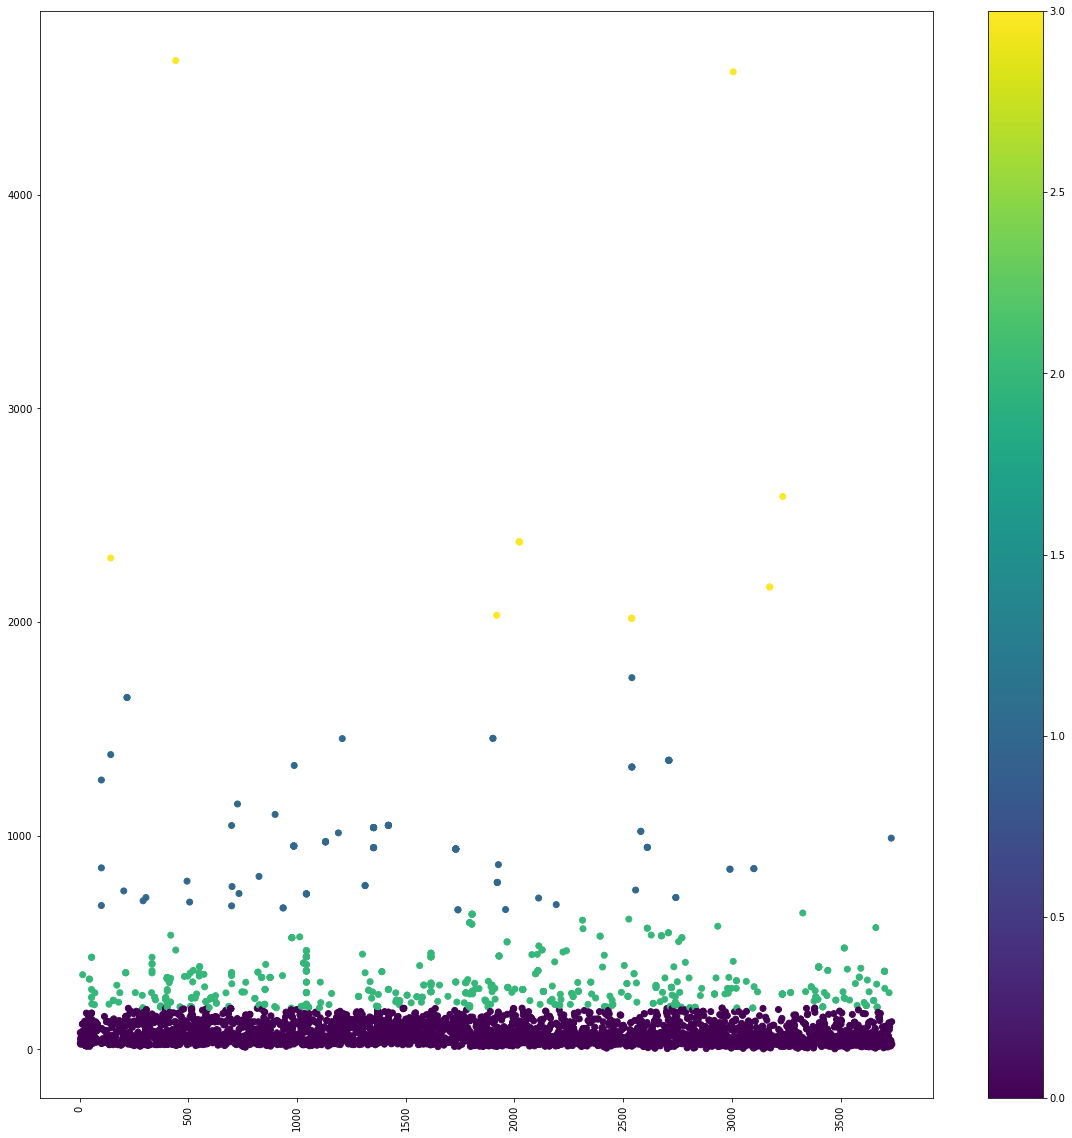

In [19]:
plt.figure(figsize=(20,20))
plt.scatter(y=df['Orders.total'],x=df['Customers.id'],c=pred)
plt.xticks(rotation=90)
plt.colorbar()
plt.show();

Number of cluster: 2 , Score: 0.8934485996104685
Number of cluster: 3 , Score: 0.8610572746352275
Number of cluster: 4 , Score: 0.7054308575236702
Number of cluster: 5 , Score: 0.6980283390272505
Number of cluster: 6 , Score: 0.6136594164812811
Number of cluster: 7 , Score: 0.6229689694200414
Number of cluster: 8 , Score: 0.6241511794525164
Number of cluster: 9 , Score: 0.6058166946528
Number of cluster: 10 , Score: 0.5534976614436516


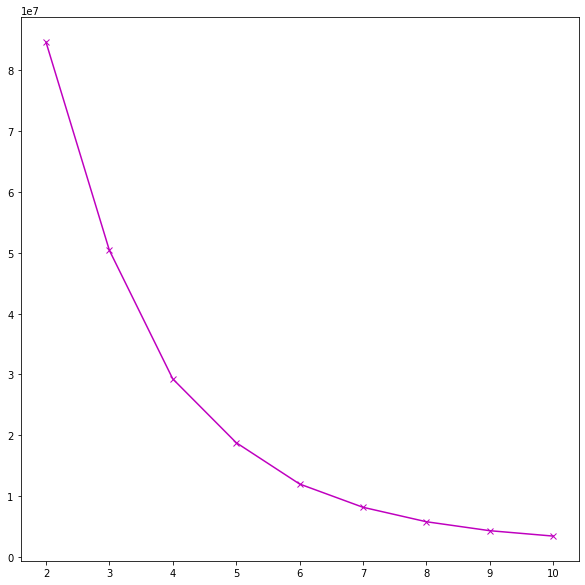

In [20]:
cluster(data,10)